<a href="https://colab.research.google.com/github/huda-fatima23/Projects-/blob/main/Lung_cancer_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LUNG CANCER Final Project (Huda Fatima)


*   I have chosen to conduct Data Analysis on the topic of lung cancer and air pollution because of its critical importance in understanding the impact of environmental factors on public health. Air pollution, a growing global concern, has been linked to various respiratory diseases, including lung cancer, due to prolonged exposure to harmful pollutants such as nitrogen dioxide (NO2), sulfur dioxide (SO2), and particulate matter. By analyzing these datasets, I aim to uncover patterns and correlations between pollution levels, lung cancer incidence and lung cancer mortality rates, helping to identify high-risk States.The research will be used as valuable insights to the broader understanding of environmental health risks and enhance the quality of public health.









##Datasets and the Sources:

Links for datasets and its formats-

https://drive.google.com/drive/u/0/folders/1fSX-bPUYPoXQnOIsgDSppg2-KBUjZvWg

1.   pollution_2000_2023.csv in CSV format from https://www.kaggle.com/datasets/guslovesmath/us-pollution-data-200-to-2022
2.   Data_Set_Final_LTD_Slope_Intercept.xlsx in excel from : https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HMOEJO
3.   lung_cancer_death in excel from : https://www.statista.com/statistics/1286334/lung-and-bronchus-cancer-deaths-us-state/



##Loading necessary libraries

In [ ]:
# Importing basic python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##Working with pollution dataset
This dataset provides detailed information about air quality, including measurements of key pollutants such as Ozone (O3), Carbon Monoxide (CO), Sulfur Dioxide (SO2), and Nitrogen Dioxide (NO2) across States in U.S. This dataset is crucial for understanding environmental conditions and identifying areas with potentially hazardous air quality levels. I will be using the various pollutants data across States.

In [ ]:
# Reading the CSV file into a pandas DataFrame pollution.
pollution_data = pd.read_csv("pollution_2000_2023.csv")

In [ ]:
# Display the first five rows of the dataset to understand its structure and preview the data
pollution_data.head()

,Unnamed: 0,Date,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,0,2000-01-01,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.040,10,37,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,1,2000-01-02,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.032,10,30,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2,2000-01-03,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,0.016,9,15,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,3,2000-01-04,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.033,9,31,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,4,2000-01-05,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,0.012,9,11,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58


In [ ]:
# Get the shape of the dataset (number of rows and columns) to assess its size
pollution_data.shape

(665414, 22)

In [ ]:
# List all column names to check the variables available in the dataset
pollution_data.columns

Index(['Unnamed: 0', 'Date', 'Address', 'State', 'County', 'City', 'O3 Mean',
       'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'CO Mean',
       'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI', 'SO2 Mean',
       'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI'],
      dtype='object')

In [ ]:
# Display the data types of each column to identify numerical, categorical, or textual data
pollution_data.dtypes

,0
Unnamed: 0,int64
Date,object
Address,object
State,object
County,object
City,object
O3 Mean,float64
O3 1st Max Value,float64
O3 1st Max Hour,int64
O3 AQI,int64


In [ ]:
# Get a detailed summary of the dataset, including the count of non-null values and data types
pollution_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665414 entries, 0 to 665413
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         665414 non-null  int64  
 1   Date               665414 non-null  object 
 2   Address            665414 non-null  object 
 3   State              665414 non-null  object 
 4   County             665414 non-null  object 
 5   City               665414 non-null  object 
 6   O3 Mean            665414 non-null  float64
 7   O3 1st Max Value   665414 non-null  float64
 8   O3 1st Max Hour    665414 non-null  int64  
 9   O3 AQI             665414 non-null  int64  
 10  CO Mean            665414 non-null  float64
 11  CO 1st Max Value   665414 non-null  float64
 12  CO 1st Max Hour    665414 non-null  int64  
 13  CO AQI             665414 non-null  float64
 14  SO2 Mean           665414 non-null  float64
 15  SO2 1st Max Value  665414 non-null  float64
 16  SO



##*   Find Duplicate Rows :
 This suggests the dataset does not have
redundant entries, which is a positive sign for data quality, as duplication could otherwise skew analysis results. It confirms that all rows are unique based on the default criteria




In [ ]:
# Find and display any duplicated rows in the dataset to identify redundancy
pollution_data[pollution_data.duplicated()]

,Unnamed: 0,Date,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI




##*   Checking Missing Values:
 counting the number of missing values in each column to determine if data cleaning is needed.







In [ ]:
# Check for missing values in each column
pollution_data.isnull().sum()

,0
Unnamed: 0,0
Date,0
Address,0
State,0
County,0
City,0
O3 Mean,0
O3 1st Max Value,0
O3 1st Max Hour,0
O3 AQI,0


## Working with Air Quality-Lung Cancer Data:
In this dataset, I am focusing specifically on lung cancer data, PM2.5 levels (fine particulate matter) across U.S states. These key variables will allow me to later analyze the relationship between lung cancer outcomes and air pollution, particularly focusing on the impact of PM2.5. By linking this data later with the pollution dataset, which contains information on other pollutants such as Ozone (O3), Nitrogen Dioxide (NO2), and Sulfur Dioxide (SO2), I can explore how different pollutants might correlate with lung cancer incidence


In [ ]:
# Load and preview the health dataset
cancer_incidence = pd.read_excel("/content/Data_Set_Final_LTD_Slope_Intercept.xlsx")

In [ ]:
# Preview the first five rows to understand its structure
cancer_incidence.head()

,FIPS_code,County,State,Lung Cancer,PM2.5,Status Variable,Land_EQI,Sociod_EQI,Built_EQI,LTD,...,Status,LCI,UCI,Inter,Slp,control,treat,Local_Treat,AAC,RT
0,1001,Autauga,AL,73.9,12.06,1,-0.706591,0.670436,-0.497301,4.79,...,2,64.3,84.6,42.94,2.60,68.6143,73.4043,4.7900,44,stable
1,1003,Baldwin,AL,68.4,11.12,1,-1.084299,0.553073,0.401585,3.68,...,2,63.9,73.1,40.54,2.76,66.0568,69.7357,3.6789,181,stable
2,1005,Barbour,AL,76.1,12.36,1,-1.281470,-1.236294,0.048854,0.87,...,2,63.3,90.9,77.48,-0.11,75.7286,76.6000,0.8714,26,stable
3,1007,Bibb Cou,AL,86.4,12.24,1,-0.827410,-0.600018,-1.290857,19.95,...,2,71.2,104.1,-6.00,7.64,65.9182,85.8692,19.9510,23,stable
4,1009,Blount C,AL,73.1,12.97,1,-0.622934,0.296509,-1.262740,19.95,...,2,64.5,82.6,37.83,3.36,69.9500,76.9564,7.0064,54,stable


In [ ]:
# Check dataset size and structure
cancer_incidence.shape

(2602, 34)

In [ ]:
# Provides details about the dataset, such as column data types and non-null values
cancer_incidence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602 entries, 0 to 2601
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FIPS_code        2602 non-null   int64  
 1   County           2602 non-null   object 
 2   State            2602 non-null   object 
 3   Lung Cancer      2602 non-null   float64
 4   PM2.5            2602 non-null   float64
 5   Status Variable  2602 non-null   int64  
 6   Land_EQI         2602 non-null   float64
 7   Sociod_EQI       2602 non-null   float64
 8   Built_EQI        2602 non-null   float64
 9   LTD              2602 non-null   float64
 10  Intercept        2602 non-null   float64
 11  Slope            2602 non-null   float64
 12  CLU50_1          2602 non-null   int64  
 13  PM10             2602 non-null   float64
 14  SO2              2602 non-null   float64
 15  NO2              2602 non-null   float64
 16  O3               2602 non-null   float64
 17  CO            

##* Standardize column names for consistency

In [ ]:
# Standardize column names for consistency
# Standardizing column names for the pollution dataset
pollution_data.columns = pollution_data.columns.str.strip().str.lower().str.replace(" ", "_")

# Standardizing column names for the cancer_incidence dataset
cancer_incidence.columns = cancer_incidence.columns.str.strip().str.lower().str.replace(" ", "_")

In [ ]:
# Verify standardized column names
print(pollution_data.columns)
print(cancer_incidence.columns)

Index(['unnamed:_0', 'date', 'address', 'state', 'county', 'city', 'o3_mean',
       'o3_1st_max_value', 'o3_1st_max_hour', 'o3_aqi', 'co_mean',
       'co_1st_max_value', 'co_1st_max_hour', 'co_aqi', 'so2_mean',
       'so2_1st_max_value', 'so2_1st_max_hour', 'so2_aqi', 'no2_mean',
       'no2_1st_max_value', 'no2_1st_max_hour', 'no2_aqi'],
      dtype='object')
Index(['fips_code', 'county', 'state', 'lung_cancer', 'pm2.5',
       'status_variable', 'land_eqi', 'sociod_eqi', 'built_eqi', 'ltd',
       'intercept', 'slope', 'clu50_1', 'pm10', 'so2', 'no2', 'o3', 'co', 'cn',
       'disel', 'cs2', 'air_eqi', 'water_eqi', 'eqi', 'status', 'lci', 'uci',
       'inter', 'slp', 'control', 'treat', 'local_treat', 'aac', 'rt'],
      dtype='object')


## Finding Duplicate Rows

In [ ]:
# Identify duplicate rows
duplicate_count = cancer_incidence.duplicated().sum()  # Count the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_count}") # Display the duplicate count

Number of duplicate rows: 0


### Check for missing values

The output shows the count of missing values in each column of the dataset. Most columns have no missing values, which indicates good data quality for the majority of the dataset. However, the columns Inter, Slp, control, treat, and Local_Treat have a significant number of missing values (2552 or more). These columns may not contribute meaningfully to the analysis due to the extent of missing data.

Next, I will handle these missing values by dropping these columns, as they likely hold limited utility in the context of this analysis.

In [ ]:
#Check for missing values
cancer_incidence.isnull().sum()
print (cancer_incidence.isnull().sum())

fips_code             0
county                0
state                 0
lung_cancer           0
pm2.5                 0
status_variable       0
land_eqi              0
sociod_eqi            0
built_eqi             0
ltd                   0
intercept             0
slope                 0
clu50_1               0
pm10                  0
so2                   0
no2                   0
o3                    0
co                    0
cn                    0
disel                 0
cs2                   0
air_eqi               0
water_eqi             0
eqi                   0
status                0
lci                   0
uci                   0
inter              2552
slp                2552
control            2552
treat              2554
local_treat        2554
aac                   0
rt                    0
dtype: int64


Handling these missing values by dropping these columns

In [ ]:
# Drop specific columns with missing values from the cancer_incidence dataset
columns_to_drop = ['inter', 'slp', 'control', 'treat', 'local_treat']  # Columns with significant missing data
cancer_incidence_cleaned = cancer_incidence.drop(columns=columns_to_drop)  # Drop the specified columns

# Drop rows with missing values from the cleaned dataset
cancer_incidence_cleaned = cancer_incidence_cleaned.dropna()  # Remove any rows that still have missing values

# Verify no missing values remain
print("Remaining Missing Values:\n", cancer_incidence_cleaned.isnull().sum())  # Ensure the dataset is now free of missing values

Remaining Missing Values:
 fips_code          0
county             0
state              0
lung_cancer        0
pm2.5              0
status_variable    0
land_eqi           0
sociod_eqi         0
built_eqi          0
ltd                0
intercept          0
slope              0
clu50_1            0
pm10               0
so2                0
no2                0
o3                 0
co                 0
cn                 0
disel              0
cs2                0
air_eqi            0
water_eqi          0
eqi                0
status             0
lci                0
uci                0
aac                0
rt                 0
dtype: int64


## Selecting necessary columns

In [ ]:
def clean_and_select_columns(pollution_data, cancer_incidence):
    """
    Cleans and selects necessary columns from the pollution and cancer incidence datasets.

    This function retains only the relevant columns for further analysis, focusing on the pollutants (SO2, NO2, O3, CO)
    and lung cancer data (lung cancer rate and PM2.5) by state. It prepares the datasets for a deeper analysis of the
    relationship between pollution and health outcomes.

    Args:
        pollution_data (pd.DataFrame): Raw pollution data with various pollutant levels for each state.
        cancer_incidence (pd.DataFrame): Raw cancer incidence data, including lung cancer rates and PM2.5 levels for each state.

    Returns:
        pd.DataFrame, pd.DataFrame: Cleaned and filtered datasets for pollution and cancer incidence, respectively.

    Example:
        >>> cleaned_pollution_data, cleaned_cancer_data = clean_and_select_columns(pollution_data, cancer_incidence)
    """

    # Necessary columns for pollution_data
    pollution_columns_to_keep = ['state', 'so2_mean', 'no2_mean', 'o3_mean', 'co_mean']
    pollution_data_cleaned = pollution_data[pollution_columns_to_keep]

    # Necessary columns for cancer_incidence_data
    cancer_incidence_columns_to_keep = ['state', 'lung_cancer', 'pm2.5']
    cancer_incidence_cleaned = cancer_incidence[cancer_incidence_columns_to_keep]

    return pollution_data_cleaned, cancer_incidence_cleaned

In [ ]:
import doctest
doctest.run_docstring_examples(clean_and_select_columns, globals(), verbose=True)


Finding tests in NoName
Trying:
    cleaned_pollution_data, cleaned_cancer_data = clean_and_select_columns(pollution_data, cancer_incidence)
Expecting nothing
ok


In [ ]:
pollution_data_cleaned, cancer_incidence_cleaned = clean_and_select_columns(pollution_data, cancer_incidence)
# Verify the cleaned datasets
print("Cleaned Pollution Data:\n", pollution_data_cleaned.head())
print("Cleaned Health Data:\n", cancer_incidence_cleaned.head())

Cleaned Pollution Data:
      state  so2_mean   no2_mean   o3_mean   co_mean
0  Arizona  3.000000  19.041667  0.019765  0.878947
1  Arizona  1.958333  22.958333  0.015882  1.066667
2  Arizona  5.250000  38.125000  0.009353  1.762500
3  Arizona  7.083333  40.260870  0.015882  1.829167
4  Arizona  8.708333  48.450000  0.007353  2.700000
Cleaned Health Data:
   state  lung_cancer  pm2.5
0    AL         73.9  12.06
1    AL         68.4  11.12
2    AL         76.1  12.36
3    AL         86.4  12.24
4    AL         73.1  12.97


## Merging Pollution Dataset with Air quality and lung Cancer dataset

I am merging the pollution_data_cleaned and cancer_incidence_cleaned datasets on the 'state' column to explore how pollutants might correlate with lung cancer incidence or mortality across different regions.

In [ ]:
cancer_incidence_cleaned['state'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KY', 'LA', 'ME', 'MD', 'MA', 'MS',
       'MO', 'MT', 'NE', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
       'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA',
       'WV', 'WI', 'WY'], dtype=object)

In [ ]:
#before merging I noticed that states in cancer incidence data set are in abbreviation form . For merging, I am going to normalize the states name
# Dictionary to map state abbreviations to full names
states = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'DC': 'District of Columbia',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana',
    'IA': 'Iowa', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts',
    'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NH': 'New Hampshire',
    'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota',
    'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island',
    'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin',
    'WY': 'Wyoming'
}
# Replace state abbreviations with full names
cancer_incidence_cleaned.loc[:, 'state'] = cancer_incidence_cleaned['state'].replace(states)



In [ ]:
# Checking if the values have changed.
cancer_incidence_cleaned['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [ ]:
# I am merging the two datasets to analyze the relationship between air pollution levels (such as PM2.5, SO2, NO2, O3, and CO)
# and lung cancer outcomes at the state level.

# Perform the first merge on the 'state' column
merged_data_1 = pd.merge(pollution_data_cleaned, cancer_incidence_cleaned, on='state', how='inner')

merged_data_1.head()


,state,so2_mean,no2_mean,o3_mean,co_mean,lung_cancer,pm2.5
0,Arizona,3.0,19.041667,0.019765,0.878947,22.9,5.71
1,Arizona,3.0,19.041667,0.019765,0.878947,47.7,6.38
2,Arizona,3.0,19.041667,0.019765,0.878947,35.0,5.86
3,Arizona,3.0,19.041667,0.019765,0.878947,50.9,6.85
4,Arizona,3.0,19.041667,0.019765,0.878947,42.8,6.45


## 1st Aggregation

 PM2.5 is considered one of the most harmful pollutants, as its fine particles can penetrate deep into the lungs and enter the bloodstream causing lung cancer. I am aggregating the PM2.5 and lung_cancer variables by state to summarize the data and identify broader trends at the state level. By calculating the average values for these variables across each state, I can gain insights into how air pollutant - PM2.5 and lung cancer rates are distributed and how they vary geographically.

In [ ]:
def aggregate_metrics_by_state(merged_data_1):
    """
    Aggregates air pollution (pm 2.5) and lung cancer metrics by state.

    This function computes the average values of PM2.5 and lung cancer rates for each state
    from the provided merged data.

    Args:
        merged_data_1 (pd.DataFrame): A DataFrame containing the 'state', 'pm2.5', and 'lung_cancer' columns.

    Returns:
        pd.DataFrame: A DataFrame with the aggregated average values of 'pm2.5' and 'lung_cancer' for each state.

    Example:
        >>> data = {
        >>>     'state': ['Alabama', 'Alaska', 'Arizona'],
        >>>     'pm2.5': [15.5, 8.0, 12.3],
        >>>     'lung_cancer': [71.8, 57.2, 46.1]
        >>> }
        >>> merged_data_1 = pd.DataFrame(data)
        >>> aggregate_metrics_by_state(merged_data_1)
            state   pm2.5  lung_cancer
        0  Alabama    15.5         71.8
        1   Alaska     8.0         57.2
        2  Arizona    12.3         46.1
    """
    state_agg = merged_data_1.groupby('state').agg({
        'pm2.5': 'mean',        # Average PM2.5
        'lung_cancer': 'mean',  # Average Lung Cancer rate
    }).reset_index()

    return state_agg


In [ ]:
state_agg = aggregate_metrics_by_state(merged_data_1)
state_agg.head()

,state,pm2.5,lung_cancer
0,Alabama,12.301045,71.810448
1,Alaska,2.844000,57.240000
2,Arizona,6.590667,46.100000
3,Arkansas,11.139067,81.465333
4,California,9.470893,49.192857


In [ ]:
assert state_agg['state'].iloc[0] == 'Alabama' and round(state_agg['pm2.5'].iloc[0],6) == 12.301045 and round(state_agg['lung_cancer'].iloc[0],6) == 71.810448
assert state_agg['state'].iloc[1] == 'Alaska' and round(state_agg['pm2.5'].iloc[1],6) == 2.844000 and round(state_agg['lung_cancer'].iloc[1],6) == 57.240000
assert state_agg['state'].iloc[2] == 'Arizona' and round(state_agg['pm2.5'].iloc[2],6) == 6.590667 and round(state_agg['lung_cancer'].iloc[2],6) == 46.100000

## 1st Visualization: Visualization of PM2.5 Levels and Lung Cancer Rates by State
Presenting visualization of the above aggregation for better understanding. The visualization of the aggregated PM2.5 and lung_cancer data through a side-by-side bar chart provides a clearer and more intuitive understanding of how these variables vary across different states. By reshaping the aggregated data for this chart, I am able to display both the average PM2.5 levels and lung cancer rates for each state in a comparative manner. The bar chart allows for easy identification of states with higher or lower pollution levels and corresponding lung cancer rates.

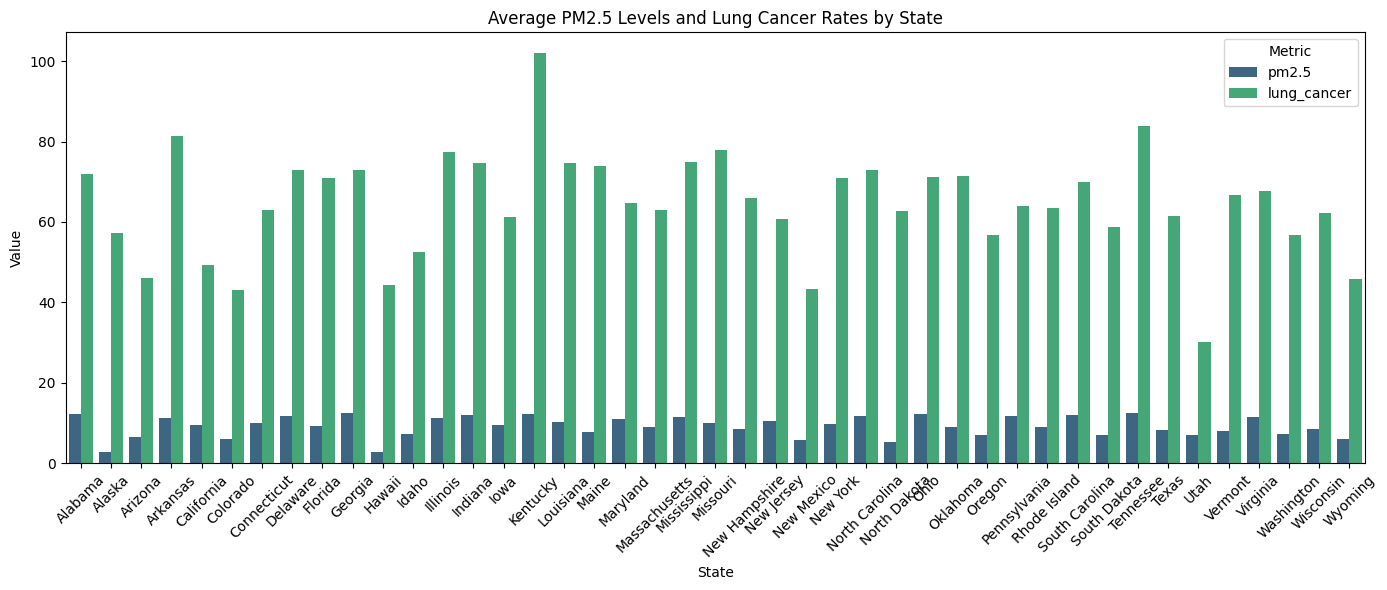

In [ ]:
# Reshape the data for a side-by-side bar chart
state_agg_melted = state_agg.melt(id_vars='state', var_name='Metric', value_name='Value')

# Create a side-by-side bar chart
plt.figure(figsize=(14, 6))
sns.barplot(
    x='state',
    y='Value',
    hue='Metric',
    data=state_agg_melted,
    palette='viridis'
)
plt.title('Average PM2.5 Levels and Lung Cancer Rates by State')
plt.ylabel('Value')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


This visualization compares average PM2.5 levels (airborne particulate matter) with lung cancer rates across various states. It shows a significant disparity between PM2.5 levels (relatively low) and lung cancer rates (substantially higher in many states). Kentucky stands out with the highest lung cancer rate, while most states show relatively low PM2.5 levels, suggesting that factors beyond air pollution may contribute to lung cancer rates.

## Working with lung cancer deaths dataset

In [ ]:
# Load the lung cancer death dataset
lung_cancer_deaths =  pd.read_excel("/content/lung_cancer_death .xlsx")
lung_cancer_deaths

,"Estimated number of lung and bronchus cancer deaths in the United States in 2024, by state","Number of lung and bronchus cancer deaths in the U.S. in 2024 , by state"
0,Florida,10230
1,California,9320
2,Texas,8050
3,New York,6100
4,Ohio,5670
5,Pennsylvania,5570
6,Michigan,4920
7,Illinois,4910
8,North Carolina,4640
9,Georgia,3770


In [ ]:
# Strip any leading or trailing spaces from column names and rename
# Remove unnecessary spaces from column names to avoid issues in data manipulation
# This ensures consistency and prevents errors during column access or merging with other datasets.
lung_cancer_deaths.columns = lung_cancer_deaths.columns.str.strip()

## Renaming columns

In [ ]:
# Rename columns to make them more meaningful and easier to work with
lung_cancer_deaths.rename(columns={
    "Estimated number of lung and bronchus cancer deaths in the United States in 2024, by state": "state", # Rename the state column for consistency with other datasets
    "Number of lung and bronchus cancer deaths in the U.S. in 2024 , by state": "lung cancer deaths" # Rename the death count column for better clarity
}, inplace=True)

# Display the updated DataFrame
# Show the modified dataset to verify the column renaming and cleaning steps
lung_cancer_deaths

,state,lung cancer deaths
0,Florida,10230
1,California,9320
2,Texas,8050
3,New York,6100
4,Ohio,5670
5,Pennsylvania,5570
6,Michigan,4920
7,Illinois,4910
8,North Carolina,4640
9,Georgia,3770


## 2nd Merge
 I am merging the lung_cancer_deaths dataset with the already merged pollution_data_cleaned and cancer_incidence_cleaned datasets. By merging these datasets, we are combining air pollution data (PM2.5, SO2, NO2, O3, CO) and lung cancer rates with specific data on lung cancer deaths, providing a comprehensive view of how environmental factors may contribute to mortality rates from lung cancer.

In [ ]:
# Ensure column names are consistent between datasets
lung_cancer_deaths.rename(columns={"State": "state"}, inplace=True)

# Merge with the existing merged dataset
final_merged_data = pd.merge(merged_data_1, lung_cancer_deaths, on="state", how="inner")

# Display the first few rows of the final merged dataset
final_merged_data.head()


,state,so2_mean,no2_mean,o3_mean,co_mean,lung_cancer,pm2.5,lung cancer deaths
0,Arizona,3.0,19.041667,0.019765,0.878947,22.9,5.71,2380
1,Arizona,3.0,19.041667,0.019765,0.878947,47.7,6.38,2380
2,Arizona,3.0,19.041667,0.019765,0.878947,35.0,5.86,2380
3,Arizona,3.0,19.041667,0.019765,0.878947,50.9,6.85,2380
4,Arizona,3.0,19.041667,0.019765,0.878947,42.8,6.45,2380


## 2nd Aggregation

NO2 emissions are a significant indicator of air pollution, primarily caused by vehicle exhaust, industrial processes, and other human activities. I am aggregating the total NO2 emissions and lung cancer deaths by state to examine the relationship between environmental pollution (specifically NO2 levels) and public health outcomes, particularly lung cancer mortality.By aggregating lung cancer deaths, I aim to assess the overall impact of lung cancer mortality at the state level.

In [ ]:
# I want to find out relationship of No2 pollutant with lung cancer deaths which is quite common nowadays due to increase in vehical consumption.
# Aggregate total NO2 emissions and lung cancer deaths by state
no2_cancer_agg = final_merged_data.groupby('state').agg({
    'no2_mean': 'sum',          # Total NO2 emissions
    'lung cancer deaths': 'sum' # Total lung cancer deaths
}).reset_index()

# Display the aggregated data
no2_cancer_agg


,state,no2_mean,lung cancer deaths
0,Alabama,1.599167e+06,460440750
1,Alaska,8.517696e+04,1591800
2,Arizona,6.403492e+06,896712600
3,Arkansas,7.830197e+06,1412444250
4,California,1.417799e+08,105033268480
5,Colorado,1.379928e+07,982084740
6,Connecticut,7.957052e+05,104190800
7,Delaware,8.628100e+04,3898080
8,Florida,3.667500e+06,5810333100
9,Georgia,6.625055e+06,2572893050


## 2nd Visualization: Visualization of NO2 Emissions and Lung Cancer Deaths by State
 Presenting visualization for above aggregation for better understanding . The dual-axis bar and line chart is chosen for visualizing the aggregated total NO2 emissions and total lung cancer deaths by state because it allows us to compare two different but potentially correlated variables on the same chart, while clearly distinguishing between them.

The bar chart is used to display NO2 emissions, as it provides a clear representation of the magnitude of pollution levels in each state. The line chart overlays the lung cancer deaths, highlighting how mortality rates change in relation to NO2 levels.

<Figure size 1200x600 with 0 Axes>

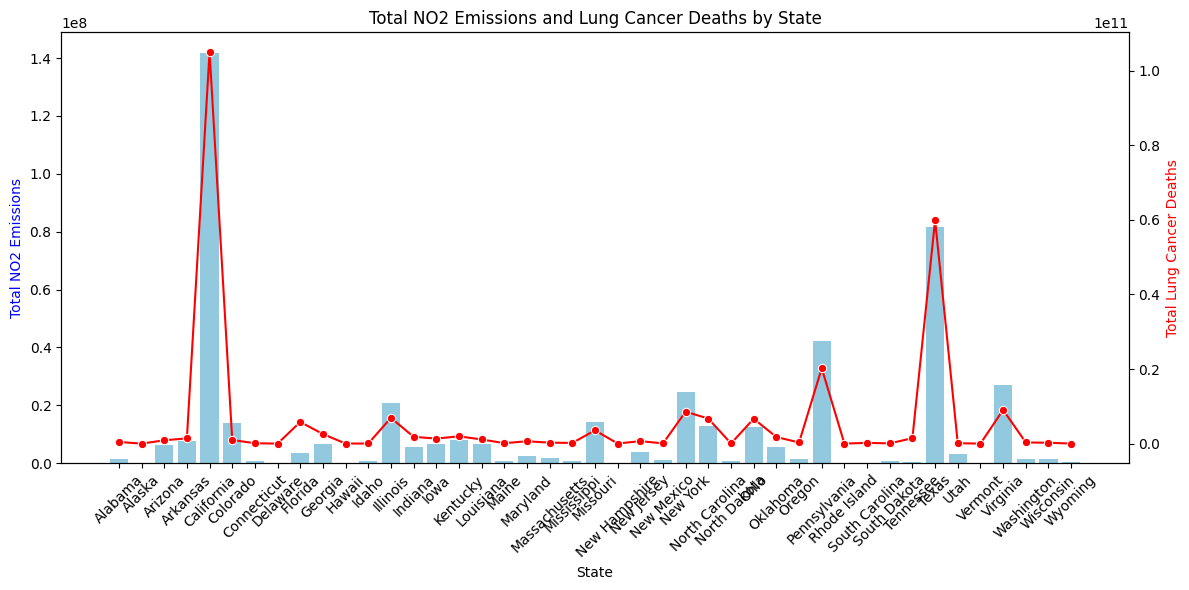

In [ ]:
# Set the plot size
plt.figure(figsize=(12, 6))

# Create a dual-axis bar and line chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot NO2 emissions as bars
sns.barplot(
    x='state',
    y='no2_mean',
    data=no2_cancer_agg,
    color='skyblue',
    ax=ax1
)
ax1.set_ylabel('Total NO2 Emissions', color='blue')
ax1.set_xlabel('State')
ax1.tick_params(axis='x', rotation=45)

# Add a secondary y-axis for lung cancer deaths
ax2 = ax1.twinx()
sns.lineplot(
    x='state',
    y='lung cancer deaths',
    data=no2_cancer_agg,
    color='red',
    marker='o',
    ax=ax2
)
ax2.set_ylabel('Total Lung Cancer Deaths', color='red')

# Add title
plt.title('Total NO2 Emissions and Lung Cancer Deaths by State')

# Show the plot
plt.tight_layout()
plt.show()

This bar and line chart compares total NO2 emissions (bars) against lung cancer deaths (line) for each state. The blue bars show NO2 levels, while the red line represents lung cancer deaths. This dual-axis visualization emphasizes the possible association between NO2 emissions and lung cancer mortality at the state level.

Observations:

States like California and Texas have high NO2 emissions but show different patterns in lung cancer mortality.

Some states with lower NO2 emissions still report significant lung cancer deaths, suggesting other factors may contribute.

## 1. Pivot Table for Pollutant Variables by State
Creating a pivot table with the pollutant variables (PM2.5, NO2, SO2, O3, and CO) aggregated by state is an important step because it allows us to summarize the data in a structured and easily interpretable format. By pivoting these variables its easier to analyze the total pollutant levels for each state

In [ ]:
# Create a pivot table that aggregates pollutant variables by state
# The pivot table will show the total levels (sum) of PM2.5, NO2, SO2, O3, and CO across each state
pivot_pollutants = final_merged_data.pivot_table(
    index='state', # Group by state
    values=['pm2.5', 'no2_mean', 'so2_mean', 'o3_mean', 'co_mean'], # Pollutant variables
    aggfunc='sum' # Use sum to get the total level of each pollutant in each state
)
# Display the first few rows of the pivot table
pivot_pollutants.head()


,co_mean,no2_mean,o3_mean,pm2.5,so2_mean
state,,,,,
Alabama,4.392707e+04,1.599167e+06,4897.400309,2.221138e+06,1.549588e+05
Alaska,2.840018e+03,8.517696e+04,115.829295,2.155752e+04,4.271322e+04
Arizona,1.648717e+05,6.403492e+06,10971.491340,2.483165e+06,4.082715e+05
Arkansas,3.413515e+05,7.830197e+06,23334.728475,9.421144e+06,1.039527e+06
California,4.633143e+06,1.417799e+08,319879.085848,1.067338e+08,1.070582e+07


## 2. Pivot Table for Particle Pollution and Lung Cancer Deaths

Grouping by state allows for understanding regional trends in air pollutant PM2.5 and lung cancer mortality. This pivot table aggregates PM2.5 levels and lung cancer deaths by state using the mean function. The goal of this aggregation is to examine the average exposure to PM2.5 (a key pollutant linked to lung cancer) and the average number of lung cancer deaths in each state

In [ ]:
# Create a pivot table that aggregates PM2.5 levels and lung cancer deaths by state
# The pivot table will show the average PM2.5 levels and average lung cancer deaths per state
pivot_particle_pollution = final_merged_data.pivot_table(
    index='state',
    values=['pm2.5', 'lung cancer deaths'],
    aggfunc='mean'  # Use mean to get the average PM2.5 levels and average lung cancer deaths per state
)
# Display the first few rows of the pivot table
pivot_particle_pollution.head()


,lung cancer deaths,pm2.5
state,,
Alabama,2550.0,12.301045
Alaska,210.0,2.844000
Arizona,2380.0,6.590667
Arkansas,1670.0,11.139067
California,9320.0,9.470893


## Calculating Total Air Pollution by State

Calculate the Sum of Pollutants for Each Row by summing the levels of various pollutants (PM2.5, NO2, SO2, O3, CO) across each row for all states. The sum of these pollutants is stored in a new column air_pollution. The data is grouped by state, and the total air_pollution for each state is aggregated using the sum() function. This gives the total air pollution for each state.

In [ ]:
def calculate_total_air_pollution(row):

 """
This code calculates the total air pollution for each state by summing the levels of
various pollutants (PM2.5, NO2, SO2, O3, CO) across all rows in the dataset.

Steps:
1. **Pollutant Summation**: For each row, the sum of the pollutants (PM2.5, NO2, SO2, O3, CO) is calculated and stored as a new column `air_pollution`.
2. **Group by State**: The total air pollution for each state is aggregated by summing the `air_pollution` column for each state.
3. **Convert to Integer**: The summed values of `air_pollution` are then converted to integers for ease of interpretation.
4. **Display**: The final result contains the total air pollution per state, presented in a readable format without scientific notation.

Returns:
- `state_air_pollution`: A DataFrame containing the total air pollution for each state. The `state` column is retained, and the `air_pollution` column contains the total pollution level for each state, formatted as an integer.

Usage Example:
>>> Alabama: 4024088
>>> Alaska: 152403
>>> Arizona: 9470771
    ...
"""

# Calculate the sum of pollutants for each row
pollutant_columns = ['pm2.5', 'no2_mean', 'so2_mean', 'o3_mean', 'co_mean']
final_merged_data['air_pollution'] = final_merged_data[pollutant_columns].sum(axis=1)

# Group by state and calculate the total air pollution
state_air_pollution = final_merged_data.groupby('state').agg({
    'air_pollution': 'sum'  # Total air pollution for each state
}).reset_index()

# Convert air pollution values to integers
state_air_pollution['air_pollution'] = state_air_pollution['air_pollution'].astype(int)


# Display the data without scientific notation
state_air_pollution


,state,air_pollution
0,Alabama,4024088
1,Alaska,152403
2,Arizona,9470771
3,Arkansas,18655554
4,California,264172516
5,Colorado,19507158
6,Connecticut,1709900
7,Delaware,188709
8,Florida,9479267
9,Georgia,15565539


In [ ]:
assert state_air_pollution.loc[state_air_pollution['state'] == 'Alabama', 'air_pollution'].values[0] == 4024088
assert state_air_pollution.loc[state_air_pollution['state'] == 'Alaska', 'air_pollution'].values[0] == 152403
assert state_air_pollution.loc[state_air_pollution['state'] == 'Arizona', 'air_pollution'].values[0] == 9470771

##3rd Visualization: Scatter Plot of Air Pollution vs Lung Cancer Occurrence by State
visualizing the relationship between air pollution levels and lung cancer deaths, providing insights into how states with higher pollution may also experience higher lung cancer death rates.


*   Step 1: Merge the air pollution data with lung cancer deaths

*   Step 2: Create the scatter plot









In [ ]:
# Merge the state_air_pollution DataFrame with lung_cancer_deaths DataFrame on the 'state' column
# This will allow us to analyze the relationship between total air pollution and lung cancer deaths across different states
final_merged_data_with_cancer = pd.merge(state_air_pollution, lung_cancer_deaths, on="state", how="inner")
final_merged_data_with_cancer.head()

,state,air_pollution,lung cancer deaths
0,Alabama,4024088,2550
1,Alaska,152403,210
2,Arizona,9470771,2380
3,Arkansas,18655554,1670
4,California,264172516,9320


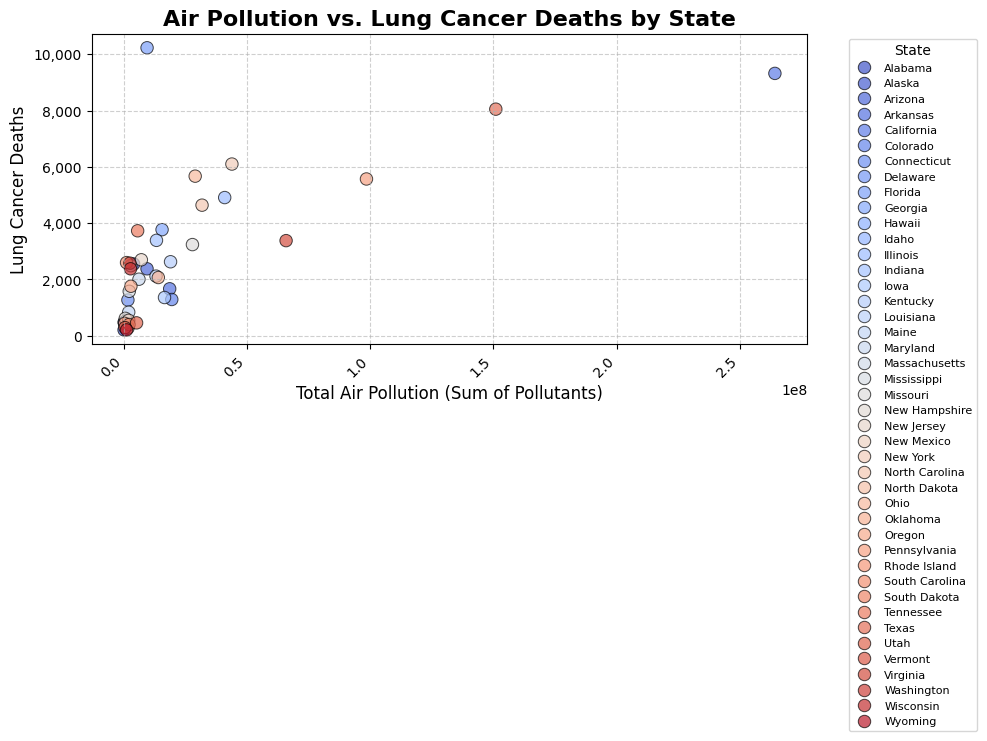

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Plotting the scatter plot for air pollution vs lung cancer deaths across states
plt.figure(figsize=(10, 6))  # Smaller figure size

# Scatterplot with enhanced styling
scatter = sns.scatterplot(
    x='air_pollution',            # X-axis: Total Air Pollution per State
    y='lung cancer deaths',       # Y-axis: Lung Cancer Deaths per State
    data=final_merged_data_with_cancer,  # The DataFrame with both air pollution and lung cancer deaths
    hue='state',                  # Coloring the points based on states
    palette='coolwarm',           # Coolwarm color palette
    s=80,                         # Smaller size of the scatter points
    edgecolor='black',            # Edge color for the scatter points
    marker='o',                   # Circle marker for each data point
    alpha=0.7                     # Transparency to avoid overlapping points
)

# Title and labels with adjusted font sizes
plt.title('Air Pollution vs. Lung Cancer Deaths by State', fontsize=16, weight='bold')
plt.xlabel('Total Air Pollution (Sum of Pollutants)', fontsize=12)
plt.ylabel('Lung Cancer Deaths', fontsize=12)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Formatting the Y-axis to avoid scientific notation
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Adjust layout and rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Legend adjustments
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

# Tight layout to avoid label clipping
plt.tight_layout()

# Show the plot
plt.show()


This scatter plot shows the relationship between total air pollution (measured as a sum of pollutants) and the number of lung cancer deaths across states. Each state is represented by a bubble, with its size and color representing the relative intensity or scale of data points. The chart helps identify whether a trend exists between air pollution levels and lung cancer mortality, suggesting potential causation or correlation for public health policy.

Observations:

States with higher air pollution levels (e.g., California) tend to have more lung cancer deaths, although some variation exists.

A cluster of states with lower air pollution levels also shows low lung cancer deaths.

## 4th Visualization: Visualization of States with the Highest and Lowest Lung Cancer Rates



*   Top 5 States with Highest Lung Cancer Rates: The first plot shows the top 5 states with the highest lung cancer rates. This allows us to identify which states have the most significant burden of lung cancer, helping highlight areas that may need increased attention in terms of health interventions, awareness programs, and potential environmental factors.


*   Top 5 States with Lowest Lung Cancer Rates: The second plot shows the top 5 states with the lowest lung cancer rates. This visualization helps identify the states that are performing better in terms of lung cancer prevention or health care, offering insights into best practices or environmental conditions that contribute to these lower rates




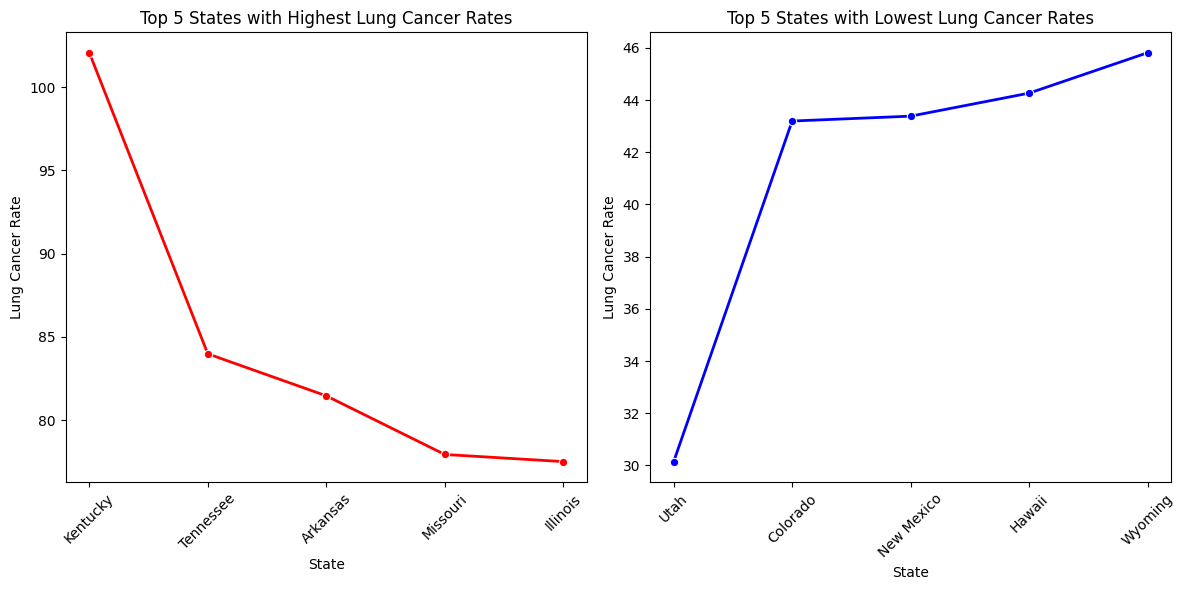

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort data by lung cancer rates
top_states = state_agg.sort_values('lung_cancer', ascending=False).head(5)  # Top 5 states
lowest_states = state_agg.sort_values('lung_cancer', ascending=True).head(5)  # Bottom 5 states

# Plot for top states
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create the first subplot
sns.lineplot(
    x='state',
    y='lung_cancer',
    data=top_states,
    marker='o',
    color='red',
    linewidth=2
)
plt.title('Top 5 States with Highest Lung Cancer Rates')
plt.xlabel('State')
plt.ylabel('Lung Cancer Rate')
plt.xticks(rotation=45)

# Plot for lowest states
plt.subplot(1, 2, 2)  # Create the second subplot
sns.lineplot(
    x='state',
    y='lung_cancer',
    data=lowest_states,
    marker='o',
    color='blue',
    linewidth=2
)
plt.title('Top 5 States with Lowest Lung Cancer Rates')
plt.xlabel('State')
plt.ylabel('Lung Cancer Rate')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

The left chart highlights the states with the highest lung cancer rates, with Kentucky leading significantly, followed by Tennessee, Arkansas, Missouri, and Illinois. The right chart shows the states with the lowest lung cancer rates, starting with Utah, followed by Colorado, New Mexico, Hawaii, and Wyoming. This contrast suggests geographical and environmental factors influencing lung cancer prevalence.

## Conclusion
In this exploratory data analysis (EDA), I focused on examining the relationship between air pollution levels, specifically PM2.5, NO2, SO2, O3, CO, and lung cancer rates across U.S. states. I aimed to investigate how varying levels of air pollution correlate with lung cancer occurrences and deaths. This topic is of significant importance due to the growing concerns about environmental factors influencing public health, particularly respiratory diseases like lung cancer.

The choice to analyze the relationship between air pollution and lung cancer is motivated by the need to understand how environmental factors contribute to public health issues.

**Observations:**

*   Correlation Between Air Pollution and Lung Cancer: It is observed that states with higher levels of air pollution tend to show increased lung cancer rates. Specifically, states with higher concentrations of PM2.5, NO2, and other pollutants often exhibited greater lung cancer deaths. This finding aligns with established research, which suggests that long-term exposure to high levels of particulate matter and gases like NO2 increases the risk of lung cancer.


*   State-wise Variations: Some states, such as California, showed significantly higher air pollution levels and lung cancer rates, while states like Alaska and Vermont had lower values in both categories. This suggests that geographical and industrial differences play a crucial role in determining the exposure to pollutants and their health impacts.



*   
Lung Cancer Deaths: My analysis also highlighted that lung cancer deaths are more prevalent in states with higher pollution levels.

Lastly, to address the concerning relationship between air pollution and lung cancer rates, it is essential for governments at both the state and federal levels to implement stronger policies aimed at reducing pollution levels. Measures such as increasing regulations on vehicle emissions, promoting the use of renewable energy sources, and improving air quality standards could help lower pollution levels. Additionally, investing in public health campaigns to raise awareness about the risks of air pollution and encouraging healthier lifestyles can also help mitigate the impact of pollution on lung cancer rates. Governments should also focus on stricter monitoring of air quality in urban and industrial areas and enforce penalties for companies that exceed pollution limits. By taking these steps, we can protect public health, reduce the burden of lung cancer, and create cleaner, healthier environments for future generations.

